#**1. Data pre-processing**

In the following sections we will examine a dataset on cervical cancer risk factors for biopsy which contains a list of risk factors for cervical cancer leading to a biopsy examination. This dataset was obtained from kaggle and can be found [here](https://www.kaggle.com/loveall/cervical-cancer-risk-classification). About 11,000 new cases of invasive cervical cancer are diagnosed each year in the United States. Although it is the most preventable type of cancer, each year cervical cancer kills about 4,000 women in the U.S. and about 300,000 women worldwide. Being able to predict what kind of risk factors are likely to lead to cervical cancer would hence be of great help in preventing the disease and tackling it as early as possible. As such, we are interested in using this dataset and apply machine learning to predict cervical cancer (indicated by the result of a biopsy examination) based on various cervical cancer risk factors. Before diving deeper into unsupervised and supervised machine learning, we are first loading the data and importing all necessary packages for the pre-processing our data.

In [ ]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#import dataset
df = pd.read_csv('https://raw.githubusercontent.com/LukasBlmr/CCD/master/kag_risk_factors_cervical_cancer.csv')

In [ ]:
#obtain information on the dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

In [ ]:
#visualize the dataset
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0


The visualization of the dataset confirms what is also reported [in the article](https://www.semanticscholar.org/paper/Transfer-Learning-with-Partial-Observability-to-Fernandes-Cardoso/1c02438ba4dfa775399ba414508e9cd335b69012) written about the dataset, that many patients did not feel comfortable in sharing specifics of their personal life and thus a question marks is reported instead of their answer. By replacing those question marks with *NaN* values, we can count them to explore which features of the dataset have how many missing values. This will also allow us to draw further conclusions about how we need to manipulate the data further. 

In [ ]:
#replace missing values ? with np.Nan
df = df.replace('?', np.NaN)

In [ ]:
# Rename variable
df=df.rename(columns = {'Biopsy':'Cancer'})

Here we decided to change a feature name from *Biopsy* to *Cancer*. The reason for this is that the feature *Biopsy* is a medical examination whose outcome is captured as either **1** (person has cancer) or **0** (person does not have cancer). The same theory applies to the features Hinselmann, Schiller and Citology, which are all medical examinations that are supposed to detect discernable characteristics that may indicate cervical cancer. However, in contrast to those tests, the outcome of a Biopsy is final, meaning that if the *Biopsy* is positive (equal to having the value 1) the person definitely has cervical cancer. As such, the feature has been renamed to *Cancer* for more intuitive results. There is also another feature called *Dx:Cancer* in the dataset which has to be clearly separated from the renamed *Cancer* variable. *Dx:Cancer* has the value **1** if the person was previously diagnosed with cancer, not necessarily cervical cancer.

In [ ]:
# Check the amount of missing values for each feature
df.isnull().sum()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

Both **"STDs: Time since first diagnosis"** and  **"STDs: Time since last diagnosis"** present 787 unconclusive/"missing" values out of the 858 etries available. We came to the conclusion that filling these missing values with either the mean or the median of the respective feature would skew the data significantly and none of the two measures appears appropriate to us. It was hence decided to drop the two features off of the dataset. As they do not contain much added value due to the high amount of missing data, they will not have much impact in the following analysis.

**Dx** furthermore did not appear to be a consistently interpretable feature. What we mean by that is that the documentation of this particular feature in the original paper is not clear. It is assumed to be a summary feature which takes on the value **1** if either one of the variables *Dx:Cancer*, *Dx:CIN* or *Dx:HPV* also has the value **1**. However, inspecting the data revealed that this was not always the case. Of course it could be that this is a mistake in the data itself, however, given that there is a lack of clear explanation regarding this in the original paper we decided to drop this feature. As we are keeping the features *Dx:Cancer*, *Dx:CIN* and *Dx:HPV*, we are still capturing the effect of these features.

All missing values that are left are furthermore replaced by the median of the respective feature. Inspecting the nature of the different features and considering what they depict, we found the median to be more appropriate than the mean as a replacement for the missing value.

In [ ]:
#looking at the dataset, many 'missing' values in STDs time columns, + Dx unclear
#drop columns
df = df.drop(columns=['STDs: Time since first diagnosis', 'STDs: Time since last diagnosis', 'Dx'])

In [ ]:
#fill missing values (old "?") with median of columns
df.fillna(df.median(), inplace=True)

In [ ]:
# After filling the rest of the missing values with their respective median, we can now see that there are no missing values.
df.isnull().sum()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


In [ ]:
#convert obj dtype into float for summary analysis
df = df.apply(pd.to_numeric)

In [ ]:
#check if action was successfull
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 33 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    int64  
 1   Number of sexual partners           858 non-null    float64
 2   First sexual intercourse            858 non-null    float64
 3   Num of pregnancies                  858 non-null    float64
 4   Smokes                              858 non-null    float64
 5   Smokes (years)                      858 non-null    float64
 6   Smokes (packs/year)                 858 non-null    float64
 7   Hormonal Contraceptives             858 non-null    float64
 8   Hormonal Contraceptives (years)     858 non-null    float64
 9   IUD                                 858 non-null    float64
 10  IUD (years)                         858 non-null    float64
 11  STDs                                858 non-n

Changing the data type of all *object* data to *float64* type allows us to compile comprehensive summary statistics and enables us to to perform further machine learning with the data.

#**2. Data visualization and exploratory data analysis**

Within the following sections, we are presenting multiple count plots for some of the continuous features of the dataset to give the reader a better understanding of what type of population sample we are working with and how the data is distributed. In addition to that, the summary statistics of the data are presented and discussed. Finally, we also provide visualization in form of a correlation matrix to see how the different features are correlated with each other and to see if we can detect any potentially interesting relationships.

In [ ]:
#summary statistics
df.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Hinselmann,Schiller,Citology,Cancer
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.0,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.0,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,2.511655,16.995338,2.257576,0.143357,1.201241,0.446278,0.686480,2.035331,0.096737,0.444604,0.092075,0.155012,0.051282,0.0,0.004662,0.050117,0.020979,0.001166,0.001166,0.001166,0.0,0.020979,0.001166,0.002331,0.087413,0.020979,0.010490,0.020979,0.040793,0.086247,0.051282,0.064103
std,8.497948,1.644759,2.791883,1.400981,0.350641,4.060623,2.210351,0.464194,3.567040,0.295771,1.814218,0.289300,0.529617,0.220701,0.0,0.068159,0.218313,0.143398,0.034139,0.034139,0.034139,0.0,0.143398,0.034139,0.048252,0.302545,0.143398,0.101939,0.143398,0.197925,0.280892,0.220701,0.245078
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,30.000000,1.000000,19.000000,1.000000,4.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Quickly gazing at the dataset *min* and *max* values for each of the features in the dataset, it is apparent that the data in it doesn't fall in any extreme/absurd direction (for example, min age is 13 and max 84). Even if some values could be perceived as extreme (for example, first sexual intercourse *min* value is 10) what needs to be kept in mind is that the data was collected in a poor, underdeveloped area where dangerous and premature sexual behaviours are not exceptional ([see article](https://www.semanticscholar.org/paper/Transfer-Learning-with-Partial-Observability-to-Fernandes-Cardoso/1c02438ba4dfa775399ba414508e9cd335b69012)).
Therefore, the dataset does not need filtering for extreme values (such as quantiles or higher/lower percentiles).

Text(0.5, 0, 'Age')

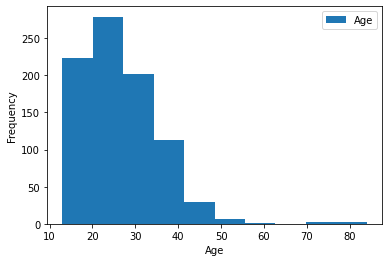

In [ ]:
#age of dataset's population
df[['Age']].plot(kind='hist')
plt.xlabel('Age')

Text(0.5, 0, 'Age')

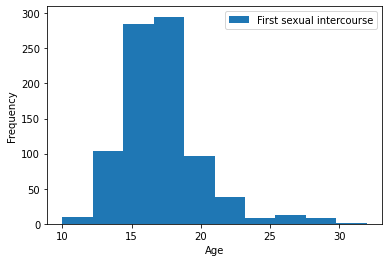

In [ ]:
#sexual behaviour of sample
df[['First sexual intercourse']].plot(kind='hist')
plt.xlabel('Age')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


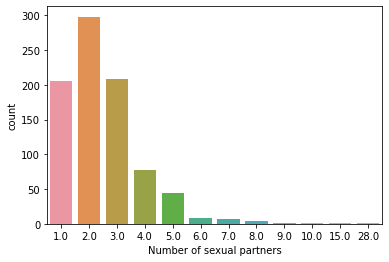

In [ ]:
# number of sexual partners
sns.countplot(df['Number of sexual partners'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


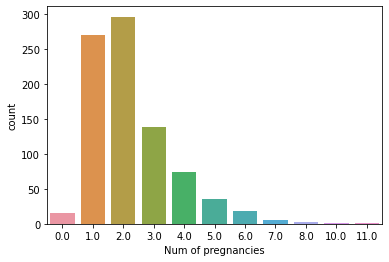

In [ ]:
# number of pregnancies
sns.countplot(df['Num of pregnancies'])

In [ ]:
# prepare correlation matrix
correlation_mat = df.corr()
sns.set(font_scale=1.25)

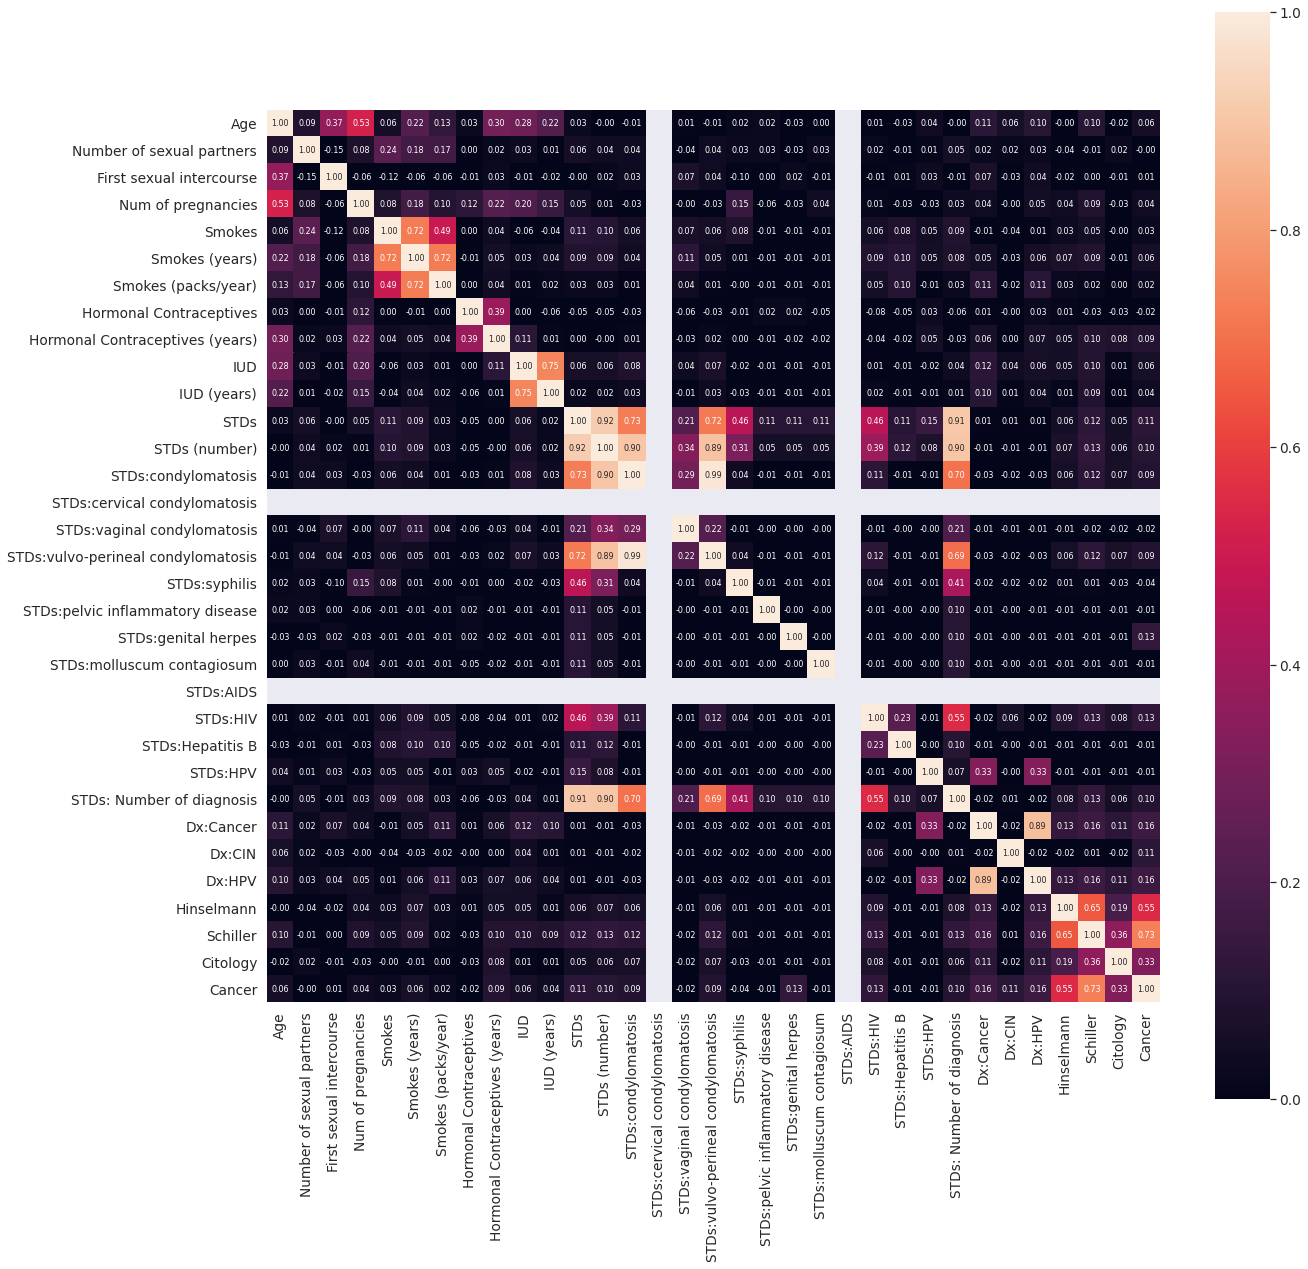

In [ ]:
# presentation of correlation matrix in form of a heatmap
fig_dims1 = (20,20)
fig, ax = plt.subplots(figsize=(fig_dims1))
sns.heatmap(correlation_mat, annot=True, cbar=True, vmin=0,vmax =1, square=True, fmt='.2f', annot_kws={'size': 8}, ax=ax)

In the above heatmap of the correlation matrix, besides the greatest (and obvious) correlation of each feature with itself and neighbor feature (e.g. between *IUD* and *IUD (years)* or *STDs* and the different kinds) the correlation that mostly stands out is the one that confirms the link between HPVs and Cancer diagnosis (0.89), since contracting HPV could potentially lead to cervical cancer. Other correlations, such as the one between *Age* and *Number of pregnancies* can also be clearly seen in the heat map. Apart from that however there are no other significant correlations obvious in the correlation matrix.

However, we not only want to rely on the heat map of this particular data, but also take into account suggestions from the literature side. As literature suggests a relationship between taking hormonal contraceptives and getting STD's, we assume a potential latent relationship that we want to further explore in the unsupervised machine learning section.

#**3. Unsupervised Machine Learning**

In this section we are applying the UML models of PCA and UMAP to see if our data exhibits any patterns without specifically looking at a target feature. Before applying these models, we first scale the data for normalisation purposes and present the scaled dataframe. We then proceed by using PCA and UMAP as two different dimensionality reduction methods and compare their respective performance. At last, we will also use KMeans clustering as well as hierarchical clustering to see if any clusters can be detected by those methods.

In [ ]:
#scale data
#import StandardScaler from the sklearn package
from sklearn.preprocessing import StandardScaler

In [ ]:
#apply the .fit_transform function to change the dataset
df_scaled = StandardScaler().fit_transform(df)
pd.DataFrame(df_scaled).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32
count,8.580000e+02,8.580000e+02,8.580000e+02,8.580000e+02,8.580000e+02,8.580000e+02,8.580000e+02,8.580000e+02,8.580000e+02,8.580000e+02,8.580000e+02,8.580000e+02,8.580000e+02,8.580000e+02,858.0,8.580000e+02,8.580000e+02,8.580000e+02,8.580000e+02,8.580000e+02,8.580000e+02,858.0,8.580000e+02,8.580000e+02,8.580000e+02,8.580000e+02,8.580000e+02,8.580000e+02,8.580000e+02,8.580000e+02,8.580000e+02,8.580000e+02,8.580000e+02
mean,3.524117e-16,-3.881899e-18,3.364312e-16,1.048113e-16,7.466185e-17,-1.123163e-16,-1.269381e-16,3.796497e-16,-2.714741e-16,3.079640e-16,6.320378e-16,8.294324e-17,9.471833e-17,1.260970e-16,0.0,-9.209805e-17,5.363490e-17,3.726623e-17,-4.066127e-16,1.570390e-16,-7.691012e-17,0.0,8.540177e-17,2.874708e-16,3.320964e-16,-9.264798e-17,9.627109e-17,-7.132989e-17,2.846726e-16,6.598581e-16,3.736974e-16,-2.483768e-16,-9.200100e-17
std,1.000583e+00,1.000583e+00,1.000583e+00,1.000583e+00,1.000583e+00,1.000583e+00,1.000583e+00,1.000583e+00,1.000583e+00,1.000583e+00,1.000583e+00,1.000583e+00,1.000583e+00,1.000583e+00,0.0,1.000583e+00,1.000583e+00,1.000583e+00,1.000583e+00,1.000583e+00,1.000583e+00,0.0,1.000583e+00,1.000583e+00,1.000583e+00,1.000583e+00,1.000583e+00,1.000583e+00,1.000583e+00,1.000583e+00,1.000583e+00,1.000583e+00,1.000583e+00
min,-1.627284e+00,-9.196100e-01,-2.507060e+00,-1.612364e+00,-4.090806e-01,-2.959993e-01,-2.020215e-01,-1.479727e+00,-5.709267e-01,-3.272564e-01,-2.452093e-01,-3.184526e-01,-2.928571e-01,-2.324953e-01,0.0,-6.843859e-02,-2.296971e-01,-1.463850e-01,-3.415935e-02,-3.415935e-02,-3.415935e-02,0.0,-1.463850e-01,-3.415935e-02,-4.833682e-02,-2.890930e-01,-1.463850e-01,-1.029597e-01,-1.463850e-01,-2.062216e-01,-3.072259e-01,-2.324953e-01,-2.617120e-01
25%,-8.030752e-01,-3.112635e-01,-7.151094e-01,-8.981627e-01,-4.090806e-01,-2.959993e-01,-2.020215e-01,-1.479727e+00,-5.709267e-01,-3.272564e-01,-2.452093e-01,-3.184526e-01,-2.928571e-01,-2.324953e-01,0.0,-6.843859e-02,-2.296971e-01,-1.463850e-01,-3.415935e-02,-3.415935e-02,-3.415935e-02,0.0,-1.463850e-01,-3.415935e-02,-4.833682e-02,-2.890930e-01,-1.463850e-01,-1.029597e-01,-1.463850e-01,-2.062216e-01,-3.072259e-01,-2.324953e-01,-2.617120e-01
50%,-2.143546e-01,-3.112635e-01,1.670816e-03,-1.839610e-01,-4.090806e-01,-2.959993e-01,-2.020215e-01,6.758005e-01,-4.306727e-01,-3.272564e-01,-2.452093e-01,-3.184526e-01,-2.928571e-01,-2.324953e-01,0.0,-6.843859e-02,-2.296971e-01,-1.463850e-01,-3.415935e-02,-3.415935e-02,-3.415935e-02,0.0,-1.463850e-01,-3.415935e-02,-4.833682e-02,-2.890930e-01,-1.463850e-01,-1.029597e-01,-1.463850e-01,-2.062216e-01,-3.072259e-01,-2.324953e-01,-2.617120e-01
75%,6.098541e-01,2.970830e-01,3.600609e-01,5.302406e-01,-4.090806e-01,-2.959993e-01,-2.020215e-01,6.758005e-01,-9.910759e-03,-3.272564e-01,-2.452093e-01,-3.184526e-01,-2.928571e-01,-2.324953e-01,0.0,-6.843859e-02,-2.296971e-01,-1.463850e-01,-3.415935e-02,-3.415935e-02,-3.415935e-02,0.0,-1.463850e-01,-3.415935e-02,-4.833682e-02,-2.890930e-01,-1.463850e-01,-1.029597e-01,-1.463850e-01,-2.062216e-01,-3.072259e-01,-2.324953e-01,-2.617120e-01
max,6.732547e+00,1.550575e+01,5.377522e+00,6.243854e+00,2.444506e+00,8.821219e+00,1.654716e+01,6.758005e-01,7.844313e+00,3.055708e+00,1.023373e+01,3.140185e+00,7.264177e+00,4.301163e+00,0.0,1.461164e+01,4.353560e+00,6.831301e+00,2.927456e+01,2.927456e+01,2.927456e+01,0.0,6.831301e+00,2.927456e+01,2.068816e+01,9.632579e+00,6.831301e+00,9.712535e+00,6.831301e+00,4.849153e+00,3.254934e+00,4.301163e+00,3.820995e+00


Although many of the variables' values where on a scale 1.0 to 0.0 to represent affermative-negative answers, the different scales of the other features (such as 'Age') would have interfered when performing dimensionality reduction and clustering actions later, hence why the data was scaled altoghether.

In [ ]:
#import PCA
from sklearn.decomposition import PCA
pca = PCA().fit(df_scaled)
print(np.cumsum(pca.explained_variance_ratio_))

[0.15579734 0.24963894 0.32728743 0.39361801 0.45372507 0.50274765
 0.54836227 0.59014953 0.62675796 0.66057378 0.69425216 0.72715265
 0.75932739 0.78934799 0.81658865 0.84277792 0.86834242 0.89249026
 0.91575579 0.93424599 0.94933112 0.9623817  0.97151763 0.97935633
 0.9864013  0.99196277 0.99549314 0.99810051 0.99973398 1.
 1.         1.         1.        ]


Text(0, 0.5, 'cumulative explained variance')

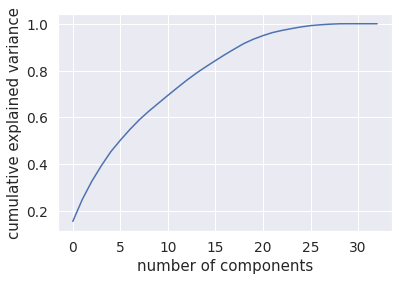

In [ ]:
# figure out optimal number of components for PCA
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

As shown above both by the explained variance ratio and its graph, the number of components that grabs a fair share of the variance while also not creating two many components is a number between 15 and 20. As the amount of additional explained variance appears to be shrinking after around 20 components, we chose 20 as the number of *n_components* for the sake of keeping this digit as low as possible for dimensionality reduction purposes while still explaining over 80% of the variance.

In [ ]:
#perform PCA dimensionality reduction
from sklearn.decomposition import PCA
pca = PCA(n_components=20, random_state=10)
pca_df = pca.fit_transform(df_scaled)
print(pca_df.shape)

(858, 20)


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


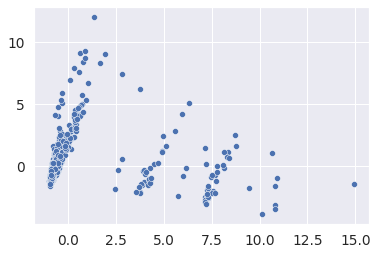

In [ ]:
#show results of PCA
sns.scatterplot(pca_df[:,0], pca_df[:,1])

Through PCA reduction, the data points within the different principal components should be set apart from the other clusters by what distinguishes them the most.

After further inspecting the dataset, the assumption was made that there is a connection between STDs and cervical cancer, not least because a correlation of STD's with a previous diagnosis of cancer was observed. Now, we are interested in finding a latent relationship between the features, something that could potentially link why STD's are associated with a higher risk of cervical cancer.

Looking at the different features, it could perhaps be the type of contraception used that makes this relationship more clear. We assume the use of hormonal contraceptives is one of the reasons that sets the datapoints apart. The reason for this assumption is that hormonal contraception methods are expected to increase the probability of getting an STD because people using them do have "unprotected" (here referring to the physical protection of a condom) intercourse while still contracepting. Put simply, choosing to contracept through condoms and not hormonally would almost completely cut out the risk for transmitting an STD, which in turn would reduce the risk of cervical cancer. As such, we are assuming a latent relationship between hormonal contraceptives and cervical cancer.
  
More on why there is not a correlation between STDs and hormonal contraceptives will be included in the attached Stakeholder Report.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


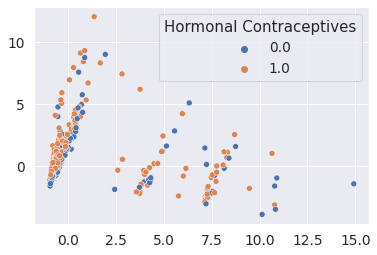

In [ ]:
#show results
sns.scatterplot(pca_df[:,0], pca_df[:,1], hue=df['Hormonal Contraceptives'])

In [ ]:
#run umap
import umap
umap = umap.UMAP(n_components=20, random_state=10)

#apply umap 'model' to data
umap_df = umap.fit_transform(df_scaled)

#show results
umap_df.shape

(858, 20)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


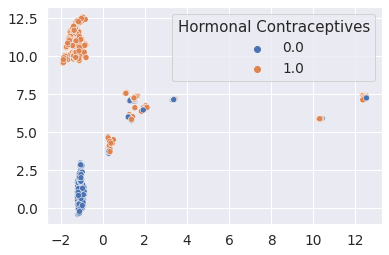

In [ ]:
sns.scatterplot(umap_df[:,0], umap_df[:,1],  hue=df['Hormonal Contraceptives'])

Looking at the two different scatterplots reveals that UMAP definitely does a better job at reducing the dimensionality in a way that matches the separation between the two groups of those who are on hormonal contraception and those who  are not. While PCA does not clearly separate the data, UMAP provides clear clusters instead. We can clearly see the difference in clusters based on whether or not a person chooses hormonal contraception. As such, we will continue the clustering in the next step with UMAP, where we will have a look at the clustering methods of KMeans and hierarchical clustering.

In [ ]:
#KMEANS
from sklearn.cluster import KMeans

#elbow method first
#calculate the elbow with a for loop
Sum_of_squared_distances = []
K = range(1,20)
for k in K:
    km = KMeans(n_clusters=k, random_state=10)
    km = km.fit(df_scaled)
    Sum_of_squared_distances.append(km.inertia_)



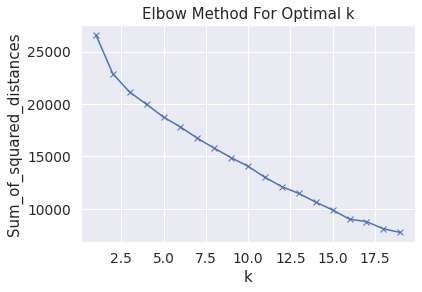

In [ ]:
#show the elbow point graph
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Looking at above graph, the optimal *k* for our KMeans clustering would be where the graph has an "elbow", meaning a kink from where on its slope gets flatter. Although not exactly clear, it seems like the function appears to *bend* and be less steep when k equals 17. We hence chose 17 clusters for our KMeans clusterer.

In [ ]:
#n_clusters
clusterer = KMeans(n_clusters=17, random_state=10)

#fit data to the clusterer model
clusterer.fit(df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=17, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=10, tol=0.0001, verbose=0)

In [ ]:
#create a colum for the graph legend
df['cluster'] = clusterer.labels_

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


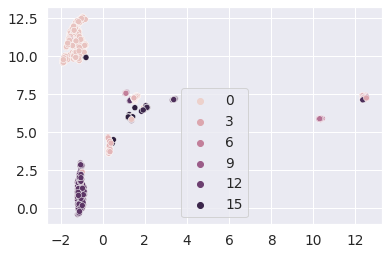

In [ ]:
#plot the graph
sns.scatterplot(umap_df[:,0], umap_df[:,1], hue=clusterer.labels_)

In [ ]:
#alternatively
#hierarchical clustering
from sklearn.cluster import AgglomerativeClustering
clusterer = AgglomerativeClustering(n_clusters=17).fit(df_scaled)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


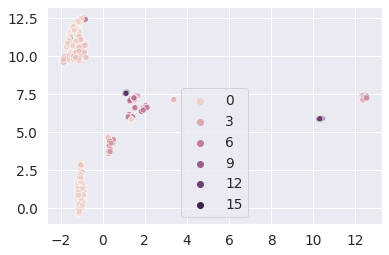

In [ ]:
#plot graph
sns.scatterplot(umap_df[:,0], umap_df[:,1], hue = clusterer.labels_ )

KMeans seems to be doing a better job to cluster the similar datapoints together than hierarchical clustering. Assuming that what sets the data points apart is in fact the assumption of hormonal contraceptives, the algorithm was able separate different clusters that stand apart from each other, much like it is shown in the UMAP graph above, where the two clusters clearly separate between the use and non-use of hormonal contraceptives. Comparing the KMeans scatterplot to above compiled UMAP scatterplot indeed shows a signficant similarity.

Hierarchical clustering on the other side was not as successful. Although clusters are formed, they are not as clearly separated as with Kmeans. Perhaps because of the high number of clusters needed for optimal clustering in this dataset, as well as because of the nature of the features, hierarchical clustering was less successful.

#**4. Supervised Machine Learning**

Before starting to apply SML, we first need to think about what type of "problem" we are facing and what type of feature we want to predict. Our target feature for SML is the feature *Cancer*, which indicates whether or not a person has cancer based on the medical procedure of a biopsy. The score **1** means that this person was found to have cancer, while **0** indicates the opposite. As we are trying to differentiate between two possible values for our target variable *Cancer*, we are dealing with a binary classification problem. The first step in our SML process after loading and pre-processing the dF is to import the packages from sklearn to be able to perform all necessary analyses. After defining our X and y value, where X contains all features **except** for the target feature and y **just** the target feature, a train and a test set are created for each of the values. We decided to use the test size of 0.25 for the train_test_split function. This means that 75% of data is used to train the model and 25% is used for the testing. After the train and test data has been scaled for normalisation purposes, we start applying three different classifier algorithms and compare them based on their performance in classfiying the target feature. The first classifier we are applying is the RandomForestClassifier. The RandomForestClassifier creates decision trees on randomly selected data samples and gets predictions from each tree and selects the best solution by means of voting.

In [ ]:
#rename dataset for clarity
dfsml = df.copy()

In [ ]:
#import sklearn packages for SML
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

In [ ]:
# Define X and y value. X are all features that are not the target variable, y is the feature that is the target variable
X = dfsml.drop('Cancer', axis=1)
y = dfsml['Cancer']

In [ ]:
# Train-/ Testset preparation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

In [ ]:
# Classifier 1: RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=10).fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
print('Accuracy score: ' + str(accuracy_score(y_test, y_pred)))

Accuracy score: 0.9488372093023256


We can see that the RandomForestClassifier is already quite accurate in its classification of data. In this case we used the default number of estimators for the RandomForestClassifier, which are 100. However, using GridSearchCV and k-fold cross validation we want to see if we can further optimize our model by tuning the number of estimators. Hence, we import the necessary packages for hyperparameter tuning and then continue with our analysis.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score

# scorer = make_scorer(r2_score)
scorer = make_scorer(mean_squared_error)

In [ ]:
# Hyperparameter tuning: define parameter to tune
parameters_randomforest = {'n_estimators':[50, 100, 150, 200, 250, 300, 350, 400, 450, 500]}

In [ ]:
# Hyperparameter tuning: Perform grid search on the classifier using k-fold cross validation and 'scorer' as the scoring method 
rf = RandomForestClassifier(random_state=10)
cv = KFold(n_splits=5)
clf = GridSearchCV(rf, parameters_randomforest, scoring=scorer, cv=cv)

In [ ]:
# Hyperparameter tuning: Fit grid_obj to X and y
clf_fit = clf.fit(X_train, y_train)

In [ ]:
print(clf_fit.best_params_)

{'n_estimators': 50}


In [ ]:
# Classifier 1: RandomForestClassifier tuned
random_forest = RandomForestClassifier(n_estimators=50, random_state=10).fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
print('Accuracy score: ' + str(accuracy_score(y_test, y_pred)))

Accuracy score: 0.958139534883721


After hyperparameter tuning, we can see that the accuracy of the RandomForestClassifier model has been improved by roughly 0.01 percentage points through changing the number of estimators of the model from the default 100 estimators to 50 estimators.

In [ ]:
# Metrics
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[196   2]
 [  7  10]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       198
           1       0.83      0.59      0.69        17

    accuracy                           0.96       215
   macro avg       0.90      0.79      0.83       215
weighted avg       0.96      0.96      0.95       215



Hyperparameter tuning revealed that 100 estimators are not the optimal number of estimators for our model. Applying the suggested optimal number of estimators as per GridSearchCV and k-fold cross validation to the RandomForestClassifier resulted in a slight improvement in accuracy for our model. Looking at the confusion matrix and classification report of the RandomForestClassifier afterwards reveals that the algorithm was fairly successful in classifying the data and shows a mediocre recall and f1-score.

In the following section, two more classifiers are applied and their repective metrics are checked in a similar manner as with the RandomForestClassifier. As the next classifier, we will use the K-Nearest Neighbors (KNN) algorithm, which is imported as KNeighborsClassifier. The KNeighborsClassifier is checking the distance from some test sample to the known values of some training sample. The group of data points that would give the smallest distance between the training points and the testing point is the class that is then chosen.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Classifier 2: KNeighborsClassifier
kneighbors = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
y_pred = kneighbors.predict(X_test)
print('Accuracy score: ' + str(accuracy_score(y_test, y_pred)))

Accuracy score: 0.9255813953488372


Here we can already see that with *n_neighbors* being 5, the KNeighborsClassifier achieves less accuracy than the RandomForestClassifier.

In [ ]:
# Hyperparameter tuning: define parameter to tune
parameters_kneighbors = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10]}

In [ ]:
# Hyperparameter tuning: Perform grid search on the classifier using 'scorer' as the scoring method.
kn = KNeighborsClassifier()
cv = KFold(n_splits=5)
clf2 = GridSearchCV(kn, parameters_kneighbors, scoring=scorer, cv=cv)

In [ ]:
# Hyperparameter tuning: Fit grid_obj to X and y
clf2_fit = clf2.fit(X_train, y_train)

In [ ]:
print(clf2_fit.best_params_)

{'n_neighbors': 1}


In [ ]:
# Classifier 2: KNeighborsClassifier tuned
kneighbors = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train)
y_pred = kneighbors.predict(X_test)
print('Accuracy score: ' + str(accuracy_score(y_test, y_pred)))

Accuracy score: 0.958139534883721


Interestingly, hyperparameter tuning of the number of neighbors has resulted in a significant improvement of accuracy for the KNeighborsClassifier model. Changing the number of neighbors of the KNeighborsClassifier from 5 to 1 results in more than a 0.03 percentage point increase in accuracy of the model.

In [ ]:
# Metrics
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[197   1]
 [  8   9]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       198
           1       0.90      0.53      0.67        17

    accuracy                           0.96       215
   macro avg       0.93      0.76      0.82       215
weighted avg       0.96      0.96      0.95       215



Comparing the results of the KNeighborsClassifier to the above compiled RandomForestClassifier reveals two things. First, the accuracy score after hyperparameter tuning is equal to that of the the RandomForestClassifier. So in accuracy itself, the two classifiers both do a fairly good job. Secondly, however, looking at the classification report we can also see that the KNeighborsClassifier exhibits a slightly lower recall and f1-score than the RandomForestClassifier. Looking at the confusion matrix furthermore suggests that the KNeighborsClassifier was similarly successful in its classification of data when compared to the RandomForestClassifier. Altough exhibiting similar accuracy scores and classification reports, we consider the KNeighborsClassifier as inferior when compared to the RandomForestClassifier due to its lower recall and f1-score. Next, we will apply and evaluate the XGBClassifier. The XGBoost stands for eXtreme Gradient Boosting, which is a boosting algorithm based on gradient boosted decision trees algorithm instead of neighbors.

In [ ]:
from xgboost import XGBClassifier

In [ ]:
# Classifier 3: XGBClassifier
xgbc = XGBClassifier(n_estimators=100, random_state=10).fit(X_train, y_train)
y_pred = xgbc.predict (X_test)
print('Accuracy score: ' + str(accuracy_score(y_test, y_pred)))

Accuracy score: 0.9627906976744186


In [ ]:
# Hyperparameter tuning: define parameter to tune
parameters_xgbc = {'n_estimators':[50,100,150,200,250,300,350,400,450,500]}

In [ ]:
# Hyperparameter tuning: Perform grid search on the classifier using k-fold cross validation 'scorer' as the scoring method.
xgb = XGBClassifier(random_state=10)
cv = KFold(n_splits=5)
clf3 = GridSearchCV(xgb, parameters_xgbc, scoring=scorer, cv=cv)

In [ ]:
# Hyperparameter tuning: Fit grid_obj to X and y
clf3_fit = clf3.fit(X_train, y_train)

In [ ]:
print(clf3_fit.best_params_)

{'n_estimators': 150}


In [ ]:
# Classifier 3: XGBClassifier tuned
xgbc = XGBClassifier(n_estimators=150, random_state=10).fit(X_train, y_train)
y_pred = xgbc.predict (X_test)
print('Accuracy score: ' + str(accuracy_score(y_test, y_pred)))

Accuracy score: 0.9534883720930233


The result for the XGBClassifier after hyperparameter tuning is most surprising. We can see that the accuracy score has declined instead of improved after hyperparameter tuning. Although we do not know the exact reason for this behaviour, we assume that a change in interaction with one of the additional keyword arguments of the XGBClassifier algorithm that have not been specified is the underlying reason for this behaviour. As the accuracy of the XGBClassifier was better with the old number of estimators, we will run the classifier with the same modifications again and have a look at its classification report and confusion matrix.

In [ ]:
# Classifier 3: XGBClassifier without tuning, as better accuracy was achieved
xgbc = XGBClassifier(n_estimators=100, random_state=10).fit(X_train, y_train)
y_pred = xgbc.predict (X_test)
print('Accuracy score: ' + str(accuracy_score(y_test, y_pred)))

Accuracy score: 0.9627906976744186


In [ ]:
# Metrics
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[195   3]
 [  5  12]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       198
           1       0.80      0.71      0.75        17

    accuracy                           0.96       215
   macro avg       0.89      0.85      0.86       215
weighted avg       0.96      0.96      0.96       215



Comparing the XGBClassifier to the KneighborsClassifier and RandomForestClassifier provides some additional information. It seems that the XGBClassifier was the most successful in classifiying the data, as can be seen by the accuracy score of roughly 0.963 as well as on the classification presented in the confusion matrix. The classification report furthermore reveals that the XGBClassifier has an improved recall and f1-score when compared to the KNeighborsClassifier and the RandomForestClassifier. As such, we conclude that the XGBClassifier is superior to both the RandomForestClassifier and the KNeighborsClassifier.

In [ ]:
# Comparing and ranking the three different classifiers

random_forest
kneighbors
xgbc
print('Model RandomForestClassifier:' + ' ' + str(random_forest.score(X_test, y_test)))
print('Model KNeighborsClassifier:' + ' ' + str(kneighbors.score(X_test, y_test)))
print('Model XGBClassifier:' + ' ' + str(xgbc.score(X_test, y_test)))

Model RandomForestClassifier: 0.958139534883721
Model KNeighborsClassifier: 0.958139534883721
Model XGBClassifier: 0.9627906976744186


The three accuracy scores of the different classifiers are once more presented and compared. All three classifiers show a good performance, but the XGBClassifier appears to perform best, especially when other metrics of the classification report, such as the recall and f1-score, are taken into consideration.

These results are especially intriguing when considering the base of each of the algorithms. Both the RandomForestClassifier and the XGBClassifier use decision tree classification, while objects using the KNeighborsClassifier are classified by a plurality vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors. Interestingly, both the RandomForestClassifier and the KNeighborsClassifier exhibit the same accuracy score after parameter tuning.

It is concluded that the XGBClassifier is the best option out of the three classifier algorithms for our classification problem. The classification of true positives, true negatives, false positives and false negatives of this model as also presented in the confusion matrix before is once more presented in form of a cross tabulation for clearer overview below. The chosen XGBClassifier successfully predicted 195 observations as not cancer that also were not cancer (true negatives) and also correctly predicted 12 cases of cancer where there was actually cancer (true positives).

In [ ]:
# defining true cancer and predicter cancer variables
true_cancer = y_test
predicted_cancer = y_pred

In [ ]:
# Cross tabulation of true cancer vs predicted cancer from the XGBClassifier
df1 = pd.DataFrame({'true_cancer': true_cancer, 'predicted_cancer': predicted_cancer}) 
pd.crosstab(df1.true_cancer, df1.predicted_cancer)

predicted_cancer,0,1
true_cancer,,
0,195,3
1,5,12
